In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,29.910000,30.250000,29.400000,29.860001,21.829727,76935100
1,2007-01-04,29.700001,29.969999,29.440001,29.809999,21.793169,45774500
2,2007-01-05,29.629999,29.750000,29.450001,29.639999,21.668890,44607200
3,2007-01-08,29.650000,30.100000,29.530001,29.930000,21.880898,50220200
4,2007-01-09,30.000000,30.180000,29.730000,29.959999,21.902834,44636600


In [3]:
#attribute type
#Date         ordinal
#Open         numeric
#High         numeric
#Low          numeric
#Close        numeric
#Adj Close    numeric
#Volume 
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#checking null values
print(df.isnull().values.any())
df.shape

False


(3806, 7)

In [24]:
# max , min , mean, sd
maxvalues=df.max()
print('max values for each attribute:')
print(maxvalues)
minvalues=df.min()
print('min values for each attribute:')
print(minvalues)
meanvalues=df.mean()
print('mean values for each attribute:')
print(meanvalues)
stdvalues=df.std()
print('std values for each attribute:')
print(stdvalues)

max values for each attribute:
Date         2022-02-11
Open         344.619995
High         349.670013
Low          342.200012
Close        343.109985
Adj Close    343.109985
Volume        319317900
dtype: object
min values for each attribute:
Date         2007-01-03
Open               15.2
High              15.62
Low               14.87
Close             15.15
Adj Close     11.511728
Volume          7425600
dtype: object
mean values for each attribute:
Open         7.595776e+01
High         7.668237e+01
Low          7.520438e+01
Close        7.597786e+01
Adj Close    7.122101e+01
Volume       4.479994e+07
dtype: float64
std values for each attribute:
Open         7.478380e+01
High         7.548768e+01
Low          7.402443e+01
Close        7.479360e+01
Adj Close    7.628312e+01
Volume       2.733162e+07
dtype: float64


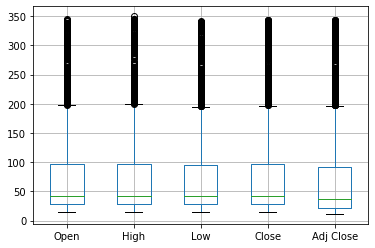

In [5]:
# finding outliers with boxplot
bxplot=df.boxplot(column=['Open','High','Low','Close','Adj Close'])
#the data extracted contains 15 years of microsoft stock data, the box plot shows that since 2020, all the records are outliers
# due to the massive rise in value, however if these data are considered outliers and excluded, the prediction for future
#price of the stock will be heavily skewed, therefore all the data will be kept for the analysis.

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

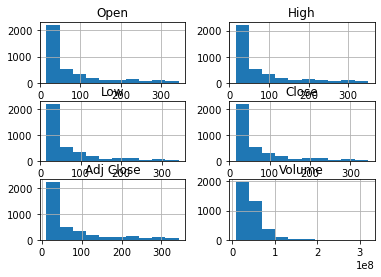

In [6]:
#histogram
df.hist()
# the class attribute is the future price for the stock, therefore attributes (open, high, low,adj close) are directly correlated
#to the class attribute as they are the actual price of stock for a specific day. with adj close being the most accurate value
# as it factors in anything that may affect stock price after market closes

In [ ]:
#the attribute volume can be included, the volume attributes shows the number of shares being traded for a specific
#day, the price of the share for that day depends on the numbers of sell/buy orders, if buy is higher than sell,
#then the price will rise. volume also shows how volatile the stock is. therefore the volumn attribute will be included

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# for linear regression, the closing price will be used. in this case, adj close will be used since it is a better 
# representation of the actual value of the stock

In [9]:
#adding a 30 day moving average MA to the dataframe for regression
df['MA']=df['Adj Close'].rolling(window=30, center=False).mean()
df['Year']=df['Date'].str[:4]
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA,Year
0,2007-01-03,29.910000,30.250000,29.400000,29.860001,21.829727,76935100,NaN,2007
1,2007-01-04,29.700001,29.969999,29.440001,29.809999,21.793169,45774500,NaN,2007
2,2007-01-05,29.629999,29.750000,29.450001,29.639999,21.668890,44607200,NaN,2007
3,2007-01-08,29.650000,30.100000,29.530001,29.930000,21.880898,50220200,NaN,2007
4,2007-01-09,30.000000,30.180000,29.730000,29.959999,21.902834,44636600,NaN,2007
...,...,...,...,...,...,...,...,...,...
3801,2022-02-07,306.170013,307.839996,299.899994,300.950012,300.950012,28533300,313.549668,2022
3802,2022-02-08,301.250000,305.559998,299.950012,304.559998,304.559998,32421200,312.286668,2022
3803,2022-02-09,309.869995,311.929993,307.390015,311.209991,311.209991,31284700,311.285334,2022
3804,2022-02-10,304.040009,309.119995,300.700012,302.380005,302.380005,45386200,309.966334,2022


In [10]:
# since date cannot be used for regression, the 30 day moving average will be used instead, the average will provide a more
# accurate model than the single day open, close data
df_linear=df[['Date','Year','Adj Close','MA']]
df_linear=df_linear.iloc[30:]
df_linear

,Date,Year,Adj Close,MA
30,2007-02-15,2007,21.611973,22.062318
31,2007-02-16,2007,21.083773,22.038671
32,2007-02-20,2007,21.149803,22.021368
33,2007-02-21,2007,21.531277,22.009714
34,2007-02-22,2007,21.560625,21.998307
...,...,...,...,...
3801,2022-02-07,2022,300.950012,313.549668
3802,2022-02-08,2022,304.559998,312.286668
3803,2022-02-09,2022,311.209991,311.285334
3804,2022-02-10,2022,302.380005,309.966334


<AxesSubplot:xlabel='Year'>

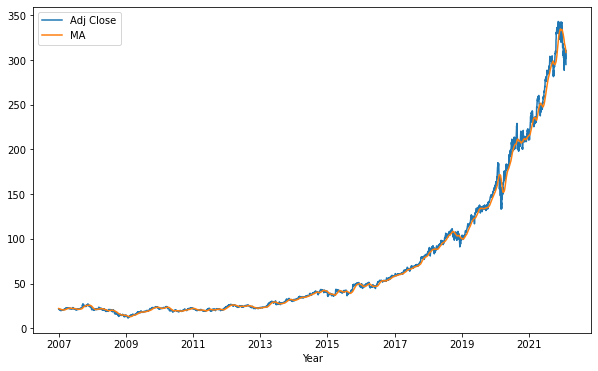

In [11]:
#showing moving day average with actual price
df_linear.plot(figsize=(10,6), x='Year')

In [173]:
#split data in to training and testing sets with the common 80/20 ratio split
x_train,x_test,y_train,y_test=train_test_split(df_linear[['MA']],df_linear[['Adj Close']],test_size=0.2)

In [174]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3020, 1)
(756, 1)
(3020, 1)
(756, 1)


In [175]:
# linear regression training, fitting and coeffcient values
linearmodel=LinearRegression()
linearmodel.fit(x_train,y_train)
r_sq=linearmodel.score(x_test,y_test)
print('linear regression coeffcient', linearmodel.coef_)
print('linear regression intercept',linearmodel.intercept_)
print('linear regression r squared',r_sq)

linear regression coeffcient [[1.01693442]]
linear regression intercept [-0.11287425]
linear regression r squared 0.9963341730338029


In [176]:
#using model to predict test set
# actual vs predicted values
predicted=linearmodel.predict(x_test)
y_test1=y_test
y_test1
y_test1.reset_index(drop=True, inplace=True)
p=pd.concat([y_test,dfa],axis=1)
p

,Adj Close,predicted
0,167.045334,20.462387
1,19.026920,20.138745
2,20.678446,19.668458
3,19.819361,91.060984
4,98.302605,19.271227
...,...,...
751,47.111507,114.510138
752,186.429504,21.128653
753,21.895555,222.221051
754,314.980011,101.530653


In [177]:
#summary of basic statistics of predicted vs actual
p.describe()

,Adj Close,predicted
count,756.000000,756.000000
mean,73.814887,66.313597
std,76.955180,70.730322
min,11.511728,12.360312
25%,22.279207,21.787657
50%,38.701595,33.873687
75%,100.995203,87.448385
max,339.399994,334.760355


In [178]:
# indicators for model evaluation, the MSE is quite high, RMSE is quite high, therefore the results shows the model is not
# ideal for prediction.
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('mean absolute error', mean_absolute_error(predicted,y_test))
print('mean squared error', mean_squared_error(predicted,y_test))
print('root mean squared error', mean_squared_error(predicted,y_test, squared=False))

mean absolute error 2.3386265800515877
mean squared error 21.68067684529334
root mean squared error 4.656251372648747


In [179]:
# average accuracy calculation, since the predicted will never be exact as actual, the average was used
p.columns=[c.replace(' ','_') for c in p.columns]
y_accuracy=p.Adj_Close.mean()
x_accuracy=p.predicted.mean()
modelaccuracy=x_accuracy/y_accuracy*100
print('accuracy of the model is',modelaccuracy)

accuracy of the model is 89.83770102938519


In [180]:
p

,Adj_Close,predicted
0,167.045334,20.462387
1,19.026920,20.138745
2,20.678446,19.668458
3,19.819361,91.060984
4,98.302605,19.271227
...,...,...
751,47.111507,114.510138
752,186.429504,21.128653
753,21.895555,222.221051
754,314.980011,101.530653


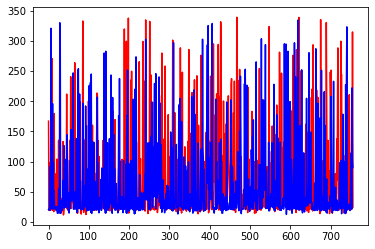

In [183]:
plt.plot(p.Adj_Close,color='red')
plt.plot(p.predicted,color='blue')

In [ ]:
# as seen in the graph, linear regression is not the best method for predictions of future stock prices,
# msft's stock has seen an exponential growth in the last few years, therefore linear regression produces inaccurate 
# predictions as seen in some of the predicted vs actual values in the chart above. Another model will be developed for the 
# purpose of price prediction, notably KNN